In [54]:
import networkx as nx
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [57]:
flag = 'lat'
a_hats = sio.loadmat(f'/Users/stiso/Documents/Code/graph_learning/ECoG_data/behavior_preprocessed/a_hat_ex_{flag}.mat')
a_hats = a_hats['A_hats']

In [58]:
graphid=1

In [59]:
G = nx.convert_matrix.from_numpy_array(a_hats[:,:,graphid])
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 10\nNumber of edges: 45\nAverage degree:   9.0000'

In [60]:
# A = np.array([[0, 1, 1, 1, 0, 0, 0, 0, 0, 1],
#     [1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
#     [1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
#     [1, 1, 1, 0, 1, 0, 0, 0, 0, 0],
#     [0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
#     [0, 0, 0, 0, 1, 0, 1, 1, 1, 0],
#     [0, 0, 0, 0, 0, 1, 0, 1, 1, 1],
#     [0, 0, 0, 0, 0, 1, 1, 0, 1, 1],
#     [0, 0, 0, 0, 0, 1, 1, 1, 0, 1],
#     [1, 0, 0, 0, 0, 0, 1, 1, 1, 0]])*.25
# G = nx.convert_matrix.from_numpy_array(A)
# nx.info(G)

TypeError: cannot convert dictionary update sequence element #0 to a sequence

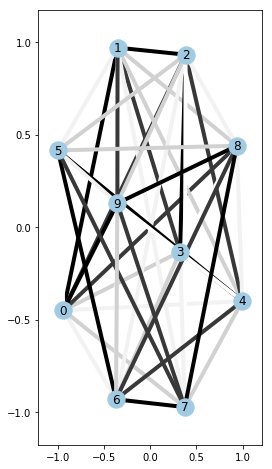

In [61]:
# set up plots

for graphid in (1,2,3,4,5,6):
    G = nx.convert_matrix.from_numpy_array(a_hats[:,:,graphid])

    nx.set_node_attributes(G, positions)
    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
    
    if flag == 'mod':
        positions = {3: {'pos': (2,7)},
          1: {'pos': (1.25,4.5)},
          2: {'pos': (2.75,4.5)},
          4: {'pos': (1.5,1)},# trans
          0: {'pos': (2.5,1)}, #trans
          5: {'pos': (1.5,-3)}, #trans
          9: {'pos': (2.5,-3)}, #trans
          7: {'pos': (2.75,-6.6)},
          8: {'pos': (1.25,-6.5)},
          6: {'pos': (2,-9)}}
    else:
        positions = nx.spring_layout(G)
    

    options = {
        "node_color": "#A0CBE2",
        "edge_color": weights,
        "width": 4,
        "edge_cmap": plt.cm.Greys,
        "with_labels": True
    }
    fig = plt.figure(figsize=(4,8))
    nx.networkx.drawing.nx_pylab.draw_networkx(G, pos=positions, **options)